##Install necessary libraries

In [1]:
%pip install numpy scipy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install numpy pandas scipy matplotlib scikit-learn tensorflow keras pytorch


Defaulting to user installation because normal site-packages is not writeable
  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  ERROR: Command errored out with exit status 1:
   command: /Library/Developer/CommandLineTools/usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/0q/44gwyztj0dlbkt4vjvhbq7v80000gn/T/pip-install-b4uim270/pytorch_85f59da3ad6645d6a4cb6c13bc71b81e/setup.py'"'"'; __file__='"'"'/private/var/folders/0q/44gwyztj0dlbkt4vjvhbq7v80000gn/T/pip-install-b4uim270/pytorch_85f59da3ad6645d6a4cb6c13bc71b81e/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/0q/44gwyztj0dlbkt4vjvhbq7v80000gn/T/pip-wheel-v_1j1aid
       cwd: /private/var/folders/0q/44gwyztj0dlbkt4vjvhbq7v800

##Load Data

In [8]:
import os
import numpy as np
import pickle

# Corrected path for macOS
dataset_path = "/Users/kostasbekis/Downloads/deap/data_preprocessed_python"

# List all .dat files in the directory
all_files = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.endswith(".dat")]

# Initialize lists for storing data and labels
all_data = []
all_labels = []

# Read data and labels from each .dat file
for file in all_files:
    with open(file, 'rb') as f:
        file_data = pickle.load(f, encoding='latin1')  # Use 'latin1' for compatibility
        all_data.append(file_data['data'])
        all_labels.append(file_data['labels'])

# Convert lists to numpy arrays for easier processing
all_data = np.concatenate(all_data, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

print("Combined data shape:", all_data.shape)
print("Combined labels shape:", all_labels.shape)


Combined data shape: (1280, 40, 8064)
Combined labels shape: (1280, 4)


In [9]:
np.save('/Users/kostasbekis/Downloads/deap/data_preprocessed_python', all_data)
np.save('/Users/kostasbekis/Downloads/deap/data_preprocessed_python', all_labels)


In [10]:
# Check the dimensions of the data and labels
print("Data shape:", np.array(all_data).shape)
print("Labels shape:", np.array(all_labels).shape)

# Inspect a single trial's data
print("Sample data (first trial):", all_data[0])
print("Sample labels (first trial):", all_labels[0])

# Check the unique values in labels
print("Unique values in labels:", np.unique(all_labels, axis=0))


Data shape: (1280, 40, 8064)
Labels shape: (1280, 4)
Sample data (first trial): [[  41.61858905   33.1385982    -4.10934406 ...   10.88743253
   -12.46669036   -6.80029233]
 [  32.60365733   16.36290704  -24.65479936 ...    9.86679907
   -12.41484003   -6.96407421]
 [  45.35555741   50.36371001   37.57930277 ...    4.41587513
    -7.27659037   -2.09761089]
 ...
 [ -33.41001314  -84.31616907  -40.22250055 ...   98.99599221
    83.18352143   97.05849579]
 [ -45.35823325  -99.54563312  -45.07698377 ...  223.2662704
   210.5475439   226.2975148 ]
 [ -32.15049398  -65.80668179  -30.40049721 ... -765.36788918
  -772.86787532 -765.61788872]]
Sample labels (first trial): [7.03 7.09 8.01 8.01]
Unique values in labels: [[1.   1.   1.   1.  ]
 [1.   1.   2.79 1.  ]
 [1.   1.   2.97 1.  ]
 ...
 [9.   9.   8.1  9.  ]
 [9.   9.   8.96 8.05]
 [9.   9.   9.   9.  ]]


Matplotlib is building the font cache; this may take a moment.


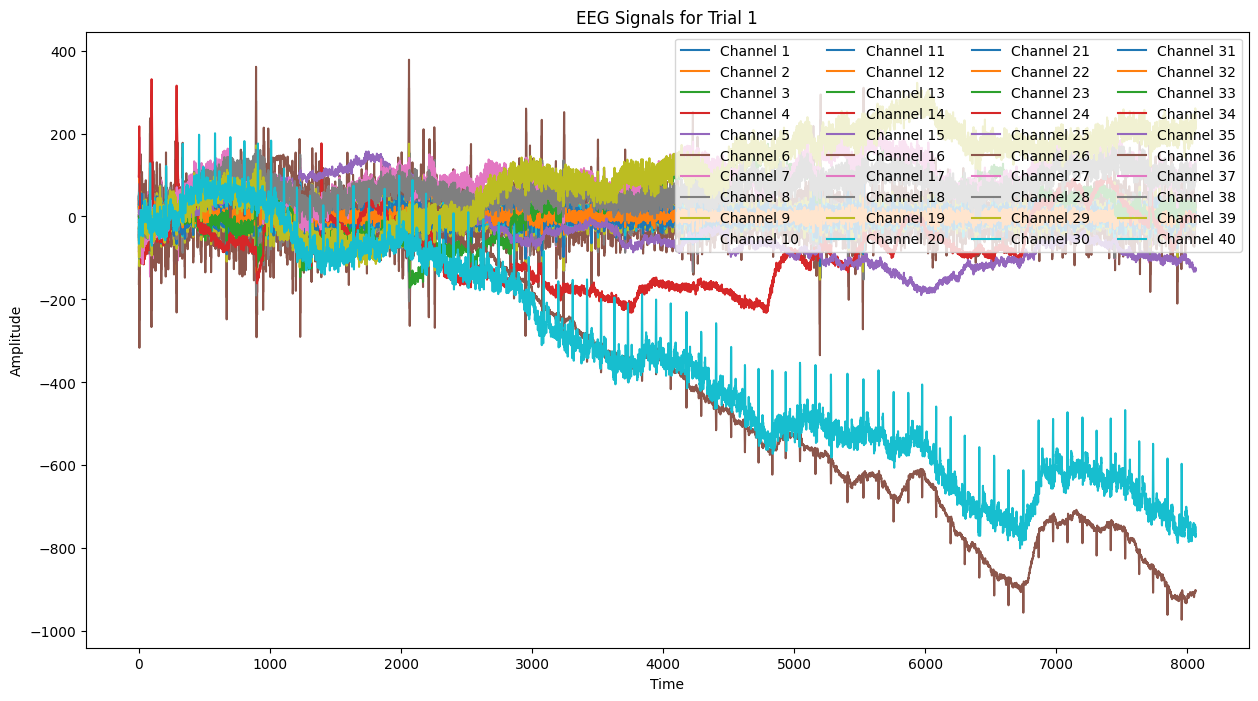

In [11]:
import matplotlib.pyplot as plt

# Choose a sample trial
sample_trial = 0

# Plot all channels in the trial
plt.figure(figsize=(15, 8))
for channel in range(len(all_data[sample_trial])):
    plt.plot(all_data[sample_trial][channel], label=f'Channel {channel+1}')

plt.title("EEG Signals for Trial 1")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(loc='upper right', ncol=4)
plt.show()


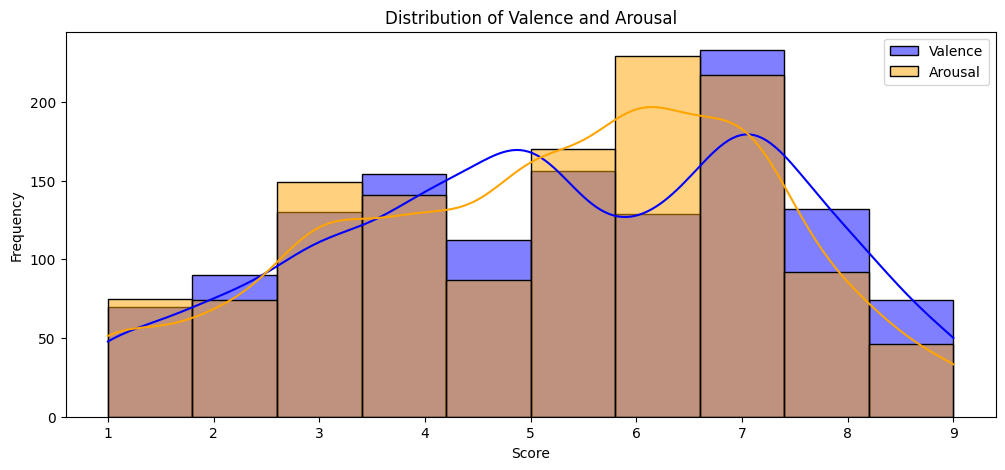

In [12]:
import seaborn as sns

# Separate label dimensions
valence = [label[0] for label in all_labels]
arousal = [label[1] for label in all_labels]

# Plot distributions
plt.figure(figsize=(12, 5))
sns.histplot(valence, kde=True, bins=10, color='blue', label='Valence')
sns.histplot(arousal, kde=True, bins=10, color='orange', label='Arousal')
plt.title("Distribution of Valence and Arousal")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [13]:
# Check for missing values in data
print("Missing values in data:", np.isnan(all_data).sum())

# Check for missing values in labels
print("Missing values in labels:", np.isnan(all_labels).sum())


Missing values in data: 0
Missing values in labels: 0


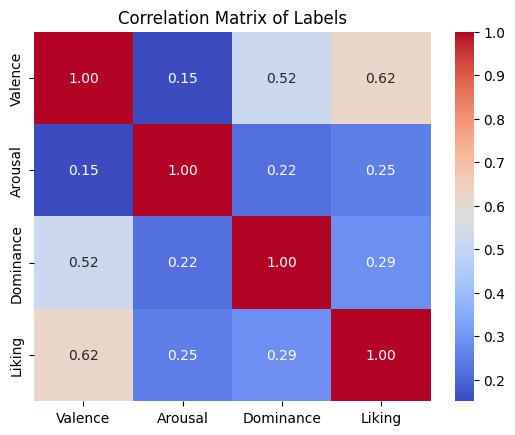

In [14]:
import pandas as pd

# Convert labels to a DataFrame for analysis
labels_df = pd.DataFrame(all_labels, columns=['Valence', 'Arousal', 'Dominance', 'Liking'])

# Correlation matrix
correlation_matrix = labels_df.corr()

# Visualize correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Labels")
plt.show()


In [15]:
# Summary of EEG data
print("EEG Data Summary:")
print("Min:", np.min(all_data))
print("Max:", np.max(all_data))
print("Mean:", np.mean(all_data))
print("Std Dev:", np.std(all_data))

# Summary of labels
print("\nLabels Summary:")
print(labels_df.describe())


EEG Data Summary:
Min: -708660.4896780138
Max: 1059702.9986999228
Mean: 160.38208341840541
Std Dev: 7683.105208703073

Labels Summary:
           Valence      Arousal    Dominance       Liking
count  1280.000000  1280.000000  1280.000000  1280.000000
mean      5.254313     5.156711     5.382750     5.518133
std       2.130816     2.020499     2.096321     2.282780
min       1.000000     1.000000     1.000000     1.000000
25%       3.867500     3.762500     3.932500     3.960000
50%       5.040000     5.230000     5.240000     6.050000
75%       7.050000     6.950000     7.040000     7.090000
max       9.000000     9.000000     9.000000     9.000000


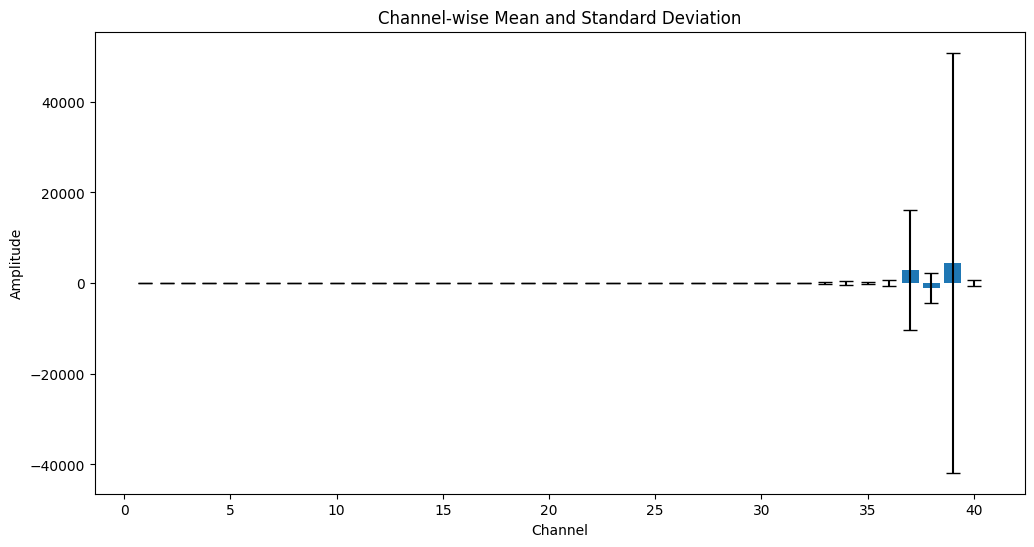

In [16]:
# Channel-wise mean and std
channel_means = np.mean(all_data, axis=(0, 2))  # Mean across trials and time
channel_stds = np.std(all_data, axis=(0, 2))  # Std dev across trials and time

plt.figure(figsize=(12, 6))
plt.bar(range(1, len(channel_means)+1), channel_means, yerr=channel_stds, capsize=5)
plt.title("Channel-wise Mean and Standard Deviation")
plt.xlabel("Channel")
plt.ylabel("Amplitude")
plt.show()


In [17]:
print(all_labels)

[[7.03 7.09 8.01 8.01]
 [7.99 8.1  8.06 9.  ]
 [9.   7.04 7.   9.  ]
 ...
 [1.   9.   1.   1.  ]
 [1.   9.   1.   1.01]
 [3.99 8.06 2.09 2.03]]


In [18]:
import os
import pickle

# Update path to match your extracted dataset folder
dataset_path = "/Users/kostasbekis/Downloads/deap/data_preprocessed_python"

# List all files
files = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.endswith(".dat")]

# Load and inspect one file
with open(files[0], 'rb') as f:
    data = pickle.load(f, encoding='latin1')

# Explore structure
print(data.keys())


dict_keys(['labels', 'data'])


In [19]:
import pickle
import numpy as np
def read_data(filename):
    x = pickle._Unpickler(open(filename, 'rb'))
    x.encoding = 'latin1'
    data = x.load()
    return data

files = []
for n in range(1, 33):
    s = ''
    if n < 10:
        s += '0'
    s += str(n)
    files.append(s)
print(files)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']


In [20]:
labels = []
data = []
for i in files:
    fileph = "/Users/kostasbekis/Downloads/deap/data_preprocessed_python/s" + i + ".dat"
    d = read_data(fileph)
    labels.append(d['labels'])
    data.append(d['data'])
print(labels)
print(data)

[array([[7.71, 7.6 , 6.9 , 7.83],
       [8.1 , 7.31, 7.28, 8.47],
       [8.58, 7.54, 9.  , 7.08],
       [4.94, 6.01, 6.12, 8.06],
       [6.96, 3.92, 7.19, 6.05],
       [8.27, 3.92, 7.  , 8.03],
       [7.44, 3.73, 7.08, 7.04],
       [7.32, 2.55, 6.32, 5.87],
       [4.04, 3.29, 3.62, 5.99],
       [1.99, 4.86, 2.04, 7.09],
       [2.99, 2.36, 3.63, 6.24],
       [2.71, 2.77, 3.4 , 7.35],
       [1.95, 3.12, 2.87, 6.18],
       [4.18, 2.24, 3.04, 5.04],
       [3.17, 8.08, 2.91, 5.04],
       [6.81, 7.44, 8.15, 7.14],
       [2.46, 6.91, 6.77, 6.41],
       [7.23, 7.15, 6.94, 8.01],
       [7.17, 8.  , 8.1 , 6.79],
       [8.26, 7.91, 7.19, 8.13],
       [9.  , 7.95, 8.37, 7.86],
       [7.09, 2.08, 7.06, 7.37],
       [8.15, 3.01, 7.37, 7.9 ],
       [7.04, 7.09, 8.01, 8.22],
       [8.86, 7.21, 8.65, 7.21],
       [7.28, 7.27, 7.41, 8.24],
       [7.35, 6.95, 7.03, 7.29],
       [3.88, 3.35, 4.01, 7.87],
       [1.36, 2.27, 3.  , 8.14],
       [2.08, 2.99, 3.22, 7.33],
       [3

In [21]:
labels = np.array(labels)
data = np.array(data)
print(labels.shape)
print(data.shape)

(32, 40, 4)
(32, 40, 40, 8064)


In [22]:
labels = labels.reshape(1280, 4)
data = data.reshape(1280, 40, 8064)
print(labels.shape)
print(data.shape)

(1280, 4)
(1280, 40, 8064)


In [23]:
eeg_data = data[:,:32,:]
print(eeg_data.shape)

(1280, 32, 8064)


In [24]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew

# Function to calculate statistical features for each EEG band
def calculate_statistical_features(data):
    # Compute mean, standard deviation, kurtosis, and skewness
    mean = np.mean(data, axis=1)
    std_dev = np.std(data, axis=1)
    kurt = kurtosis(data, axis=1)
    skewness = skew(data, axis=1)
    # Combine features into a single array
    features = np.vstack((mean, std_dev, kurt, skewness)).T
    return features

# Calculate statistical features for each EEG band separately
eeg_stat_features = []
for band_data in eeg_data.transpose(1, 0, 2):
    band_features = calculate_statistical_features(band_data)
    eeg_stat_features.append(band_features)

# Concatenate features horizontally
eeg_stat_features = np.concatenate(eeg_stat_features, axis=1)

# Print the shape of the calculated features
print("Shape of statistical features:", eeg_stat_features.shape)

# Convert features to a DataFrame for better visualization
df_stat_features = pd.DataFrame(eeg_stat_features)

# Display the DataFrame
print(df_stat_features)

Shape of statistical features: (1280, 128)
           0         1          2         3         4          5          6    \
0    -0.028259  3.889422   0.743994 -0.046640 -0.015335   4.214492   1.329109   
1    -0.082712  4.260994   0.710815 -0.083895 -0.031351   4.599634   0.851373   
2     0.060689  4.317223   0.822480 -0.032862  0.081124   4.728715   1.665044   
3    -0.027773  3.961901   0.869061 -0.061074 -0.011902   4.352078   1.322036   
4    -0.062537  3.522773   0.368222  0.012391 -0.072949   3.675880   0.835610   
...        ...       ...        ...       ...       ...        ...        ...   
1275 -0.015068  4.255723   0.785196 -0.187781 -0.439097  20.216307   7.920831   
1276 -0.074093  4.624853   0.950409 -0.174292 -0.608723  21.732170  12.642059   
1277 -0.012218  4.211918   0.797275 -0.109377  0.272855  20.021320   9.018652   
1278  0.048134  5.774315  11.005193 -0.974325  0.047834  16.377353   8.394971   
1279 -0.030110  4.303603   0.671005 -0.224528  0.049626  19.049399

In [25]:
from scipy.signal import welch
from scipy.integrate import simps
def bandpower(data, sf, band):
    band = np.asarray(band)
    low, high = band
    nperseg = (2 / low) * sf
    freqs, psd = welch(data, sf, nperseg=nperseg)
    freq_res = freqs[1] - freqs[0]
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    bp = simps(psd[idx_band], dx=freq_res)
    return bp

def get_band_power(people, channel, band):
    bd = (0,0)
    if (band == "delta"):
        bd = (0.5,4)
    if (band == "theta"):
        bd = (4,8)
    elif (band == "alpha"):
        bd = (8,12)
    elif (band == "beta"):
        bd = (12,30)
    elif (band == "gamma"):
        bd = (30,64)
    return bandpower(eeg_data[people,channel], 128, bd)

In [26]:
eeg_band = []
for i in range (len(eeg_data)):
    for j in range (len(eeg_data[0])):
        eeg_band.append(get_band_power(i,j,"delta"))
        eeg_band.append(get_band_power(i,j,"theta"))
        eeg_band.append(get_band_power(i,j,"alpha"))
        eeg_band.append(get_band_power(i,j,"beta"))
        eeg_band.append(get_band_power(i,j,"gamma"))

/var/folders/0q/44gwyztj0dlbkt4vjvhbq7v80000gn/T/ipykernel_79541/322418473.py:10: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  bp = simps(psd[idx_band], dx=freq_res)


In [27]:
eeg_band = np.array(eeg_band)
eeg_band = eeg_band.reshape((1280,160)) # 5×32
print(eeg_band.shape)

(1280, 160)


In [28]:
np.save("eeg_band.npy", eeg_band)
eeg_band = np.load("eeg_band.npy")
print(eeg_band.shape)

(1280, 160)


In [29]:
import pandas as pd
df_label = pd.DataFrame({'Valence': labels[:,0], 'Arousal': labels[:,1],
                        'Dominance': labels[:,2], 'Liking': labels[:,3]})
df_label

,Valence,Arousal,Dominance,Liking
0,7.71,7.60,6.90,7.83
1,8.10,7.31,7.28,8.47
2,8.58,7.54,9.00,7.08
3,4.94,6.01,6.12,8.06
4,6.96,3.92,7.19,6.05
...,...,...,...,...
1275,3.91,6.96,5.82,3.12
1276,2.81,6.13,6.06,1.04
1277,3.05,7.01,5.10,1.10
1278,3.99,7.17,4.85,1.00


In [30]:
df_label.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Valence    1280 non-null   float64
 1   Arousal    1280 non-null   float64
 2   Dominance  1280 non-null   float64
 3   Liking     1280 non-null   float64
dtypes: float64(4)
memory usage: 40.1 KB


In [31]:
df_label.describe()


,Valence,Arousal,Dominance,Liking
count,1280.000000,1280.000000,1280.000000,1280.000000
mean,5.254313,5.156711,5.382750,5.518133
std,2.130816,2.020499,2.096321,2.282780
min,1.000000,1.000000,1.000000,1.000000
25%,3.867500,3.762500,3.932500,3.960000
50%,5.040000,5.230000,5.240000,6.050000
75%,7.050000,6.950000,7.040000,7.090000
max,9.000000,9.000000,9.000000,9.000000


In [32]:
label_name = ["valence","arousal","dominance","liking"]
labels_valence = []
labels_arousal = []
labels_dominance = []
labels_liking = []
for la in labels:
    l = []
    if la[0]>5:
        labels_valence.append(1)
    else:
        labels_valence.append(0)
    if la[1]>5:
        labels_arousal.append(1)
    else:
        labels_arousal.append(0)
    if la[2]>5:
        labels_dominance.append(1)
    else:
        labels_dominance.append(0)
    if la[3]>6:
        labels_liking.append(1)
    else:
        labels_liking.append(0)

In [33]:
data_x = eeg_stat_features
print(data_x.shape)

# label_y = labels_valence
label_y = labels_arousal

# label_y = labels_dominance
# label_y = labels_liking
trainscores = []
testscores = []

(1280, 128)


In [34]:
X = data_x
from sklearn import preprocessing

poly = preprocessing.PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
X=preprocessing.scale(X)
X = preprocessing.normalize(X, norm='l2')
print(X.shape)

from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X=pca.fit_transform(X)
print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, label_y)

(1280, 8385)
(1280, 20)


In [35]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C = 0.1)
svc.fit(X_train, y_train)
train_score=svc.score(X_train,y_train)
test_score=svc.score(X_test,y_test)
print("train_score：", train_score)
print("test_score：", test_score)
trainscores.append(train_score)
testscores.append(test_score)

train_score： 0.5625
test_score： 0.615625


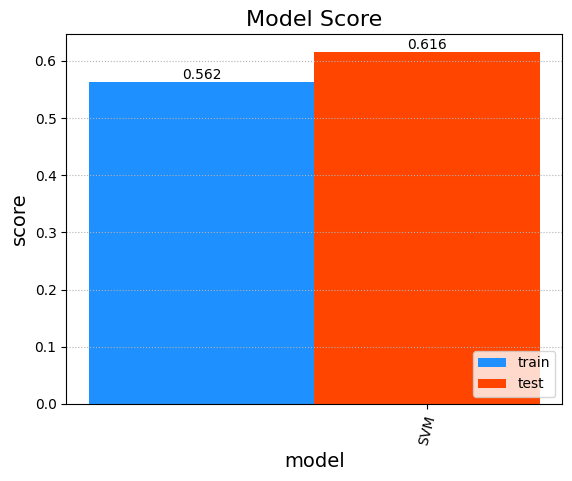

In [36]:
model_name = ["SVM"]
import matplotlib.pyplot as plt
plt.title('Model Score', fontsize=16)
plt.xlabel('model', fontsize=14)
plt.ylabel('score', fontsize=14)
plt.grid(linestyle=':', axis='y')
x = np.arange(1)
a = plt.bar(x - 0.3, trainscores, 0.3, color='dodgerblue', label='train', align='center')
b = plt.bar(x, testscores, 0.3, color='orangered', label='test', align='center')
# Set up labels
for i in a + b:
    h = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, h, '%.3f' % h, ha='center', va='bottom')
plt.xticks(x,model_name,rotation=75)
plt.legend(loc='lower right')
plt.show()

##RNN

In [37]:
import os
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

/Users/kostasbekis/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [38]:
import os
import pickle

# Update path to match your extracted dataset folder
dataset_path = "/Users/kostasbekis/Downloads/deap/data_preprocessed_python"

# List all files
files = [os.path.join(dataset_path, file) for file in os.listdir(dataset_path) if file.endswith(".dat")]

# Load and inspect one file
with open(files[0], 'rb') as f:
    data = pickle.load(f, encoding='latin1')

# Explore structure
print(data.keys())


dict_keys(['labels', 'data'])


In [39]:
import pickle
import numpy as np
def read_data(filename):
    x = pickle._Unpickler(open(filename, 'rb'))
    x.encoding = 'latin1'
    data = x.load()
    return data

files = []
for n in range(1, 33):
    s = ''
    if n < 10:
        s += '0'
    s += str(n)
    files.append(s)
print(files)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']


In [40]:
labels = []
data = []
for i in files:
    fileph = "/Users/kostasbekis/Downloads/deap/data_preprocessed_python/s" + i + ".dat"
    d = read_data(fileph)
    labels.append(d['labels'])
    data.append(d['data'])
print(labels)
print(data)

[array([[7.71, 7.6 , 6.9 , 7.83],
       [8.1 , 7.31, 7.28, 8.47],
       [8.58, 7.54, 9.  , 7.08],
       [4.94, 6.01, 6.12, 8.06],
       [6.96, 3.92, 7.19, 6.05],
       [8.27, 3.92, 7.  , 8.03],
       [7.44, 3.73, 7.08, 7.04],
       [7.32, 2.55, 6.32, 5.87],
       [4.04, 3.29, 3.62, 5.99],
       [1.99, 4.86, 2.04, 7.09],
       [2.99, 2.36, 3.63, 6.24],
       [2.71, 2.77, 3.4 , 7.35],
       [1.95, 3.12, 2.87, 6.18],
       [4.18, 2.24, 3.04, 5.04],
       [3.17, 8.08, 2.91, 5.04],
       [6.81, 7.44, 8.15, 7.14],
       [2.46, 6.91, 6.77, 6.41],
       [7.23, 7.15, 6.94, 8.01],
       [7.17, 8.  , 8.1 , 6.79],
       [8.26, 7.91, 7.19, 8.13],
       [9.  , 7.95, 8.37, 7.86],
       [7.09, 2.08, 7.06, 7.37],
       [8.15, 3.01, 7.37, 7.9 ],
       [7.04, 7.09, 8.01, 8.22],
       [8.86, 7.21, 8.65, 7.21],
       [7.28, 7.27, 7.41, 8.24],
       [7.35, 6.95, 7.03, 7.29],
       [3.88, 3.35, 4.01, 7.87],
       [1.36, 2.27, 3.  , 8.14],
       [2.08, 2.99, 3.22, 7.33],
       [3

In [41]:
import numpy as np

# Convert labels and data to NumPy arrays
labels = np.array(labels)
data = np.array(data)

# Reshape the arrays
labels = labels.reshape(1280, 4)
data = data.reshape(1280, 40, 8064)

# Print shapes to confirm
print(labels.shape)  # Should be (1280, 4)
print(data.shape)    # Should be (1280, 40, 8064)

(1280, 4)
(1280, 40, 8064)


In [42]:
# Load EEG data and labels
data = np.array(data)  # Shape: (1280, 40, 8064)
labels = np.array(labels)  # Shape: (1280, 4)

# Use only EEG data (first 32 channels)
eeg_data = data[:, :32, :]
print("EEG Data Shape:", eeg_data.shape)  # Should be (1280, 32, 8064)
print("Labels Shape:", labels.shape)  # Should be (1280, 4)


EEG Data Shape: (1280, 32, 8064)
Labels Shape: (1280, 4)


In [43]:
# Step 3: Normalize EEG Data
def normalize_trials(data):
    scaler = StandardScaler()
    for i in range(data.shape[0]):
        data[i, :, :] = scaler.fit_transform(data[i, :, :].T).T
    return data

eeg_data = normalize_trials(eeg_data)

In [44]:
# Transpose for RNN format
eeg_data = eeg_data.transpose(0, 2, 1)  # New shape: (1280, 8064, 32)
print("RNN Input Shape:", eeg_data.shape)


RNN Input Shape: (1280, 8064, 32)


In [45]:
# Step 5: One-Hot Encode Labels
def one_hot_encode_labels(labels, num_classes=2):
    return np.stack([
        to_categorical((labels[:, i] > 5).astype(int), num_classes=num_classes)
        for i in range(labels.shape[1])
    ], axis=1)

labels_categorical = one_hot_encode_labels(labels, num_classes=2)
print("Categorical Labels Shape:", labels_categorical.shape)  # (1280, 4, 2)

Categorical Labels Shape: (1280, 4, 2)


In [51]:
# Step 6: Split Data
X_train, X_temp, y_train, y_temp = train_test_split(eeg_data, labels_categorical, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}")
print(f"Train Labels Shape: {y_train.shape}")

# Step 7: Build Multi-Label RNN Model
input_layer = Input(shape=(X_train.shape[1], X_train.shape[2]))

# Shared LSTM Layers
x = LSTM(64, return_sequences=True)(input_layer)
x = Dropout(0.3)(x)
x = LSTM(64, return_sequences=False)(x)
x = Dropout(0.3)(x)

# Separate Output Layers
output_valence = Dense(2, activation='softmax', name='valence')(x)
output_arousal = Dense(2, activation='softmax', name='arousal')(x)
output_dominance = Dense(2, activation='softmax', name='dominance')(x)
output_liking = Dense(2, activation='softmax', name='liking')(x)

# Define the model with multiple outputs
model = Model(inputs=input_layer, outputs=[output_valence, output_arousal, output_dominance, output_liking])


Train Shape: (896, 8064, 32), Validation Shape: (192, 8064, 32), Test Shape: (192, 8064, 32)
Train Labels Shape: (896, 4, 2)


In [52]:
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


y_train shape: (896, 4, 2)
y_val shape: (192, 4, 2)
y_test shape: (192, 4, 2)


In [ ]:

model.compile(
    optimizer='adam',
    loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'],
    metrics=[['accuracy'], ['accuracy'], ['accuracy'], ['accuracy']]
)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 8064, 32)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 8064, 64)  │     24,832 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 8064, 64)  │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 64)        │     33,024 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ valence (Dense)     │ (None, 2)         │        130 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ arousal (Dense)     │ (None, 2)         │        130 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dominance (Dense)   │ (None, 2)         │        130 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ liking (Dense)      │ (None, 2)         │        130 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 58,376 (228.03 KB)

 Trainable params: 58,376 (228.03 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Step 8: Train the Model
# Train the model
history = model.fit(
    X_train,
    [y_train[:, 0, :], y_train[:, 1, :], y_train[:, 2, :], y_train[:, 3, :]],  # Provide separate targets for each output
    validation_data=(
        X_val,
        [y_val[:, 0, :], y_val[:, 1, :], y_val[:, 2, :], y_val[:, 3, :]]
    ),
    epochs=20,
    batch_size=32
)




Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - arousal_accuracy: 0.5285 - arousal_loss: 0.6918 - dominance_accuracy: 0.5230 - dominance_loss: 0.6996 - liking_accuracy: 0.5810 - liking_loss: 0.6804 - loss: 2.7742 - valence_accuracy: 0.4773 - valence_loss: 0.7024 - val_arousal_accuracy: 0.5781 - val_arousal_loss: 0.6783 - val_dominance_accuracy: 0.6302 - val_dominance_loss: 0.6658 - val_liking_accuracy: 0.6250 - val_liking_loss: 0.6643 - val_loss: 2.7030 - val_valence_accuracy: 0.4948 - val_valence_loss: 0.6946
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - arousal_accuracy: 0.6155 - arousal_loss: 0.6587 - dominance_accuracy: 0.5816 - dominance_loss: 0.6739 - liking_accuracy: 0.6811 - liking_loss: 0.6229 - loss: 2.6318 - valence_accuracy: 0.5865 - valence_loss: 0.6763 - val_arousal_accuracy: 0.5677 - val_arousal_loss: 0.6745 - val_dominance_accuracy: 0.6146 - val_dominance_loss: 0.6595 - val_liking_accuracy: 0.6146 - val_liking_loss: 0.6701 - val_loss: 2.7183 - val_valence_accu

NameError: name 'valence_acc' is not defined

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 581ms/step - arousal_accuracy: 0.5597 - arousal_loss: 1.2177 - dominance_accuracy: 0.5818 - dominance_loss: 1.1817 - liking_accuracy: 0.6069 - liking_loss: 0.9884 - loss: 4.6218 - valence_accuracy: 0.4923 - valence_loss: 1.2339
Valence Loss: 1.2157, Valence Accuracy: 0.50
Arousal Loss: 1.3773, Arousal Accuracy: 0.58
Dominance Loss: 1.2424, Dominance Accuracy: 0.60
Liking Loss: 0.9994, Liking Accuracy: 0.49
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 579ms/step


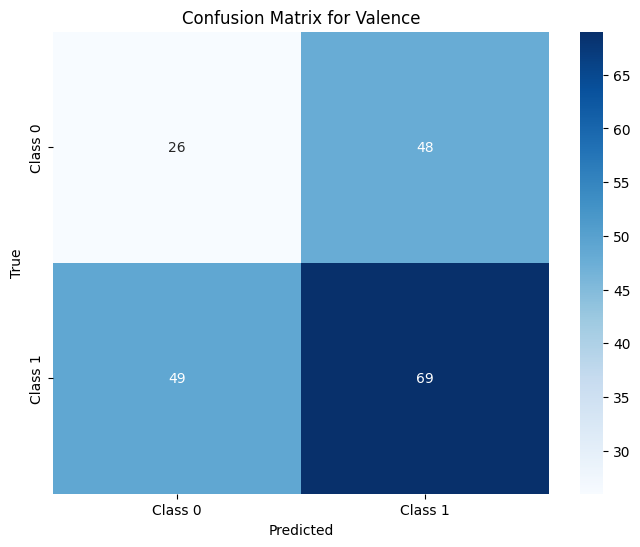

Classification Report for Valence:
              precision    recall  f1-score   support

     Class 0       0.35      0.35      0.35        74
     Class 1       0.59      0.58      0.59       118

    accuracy                           0.49       192
   macro avg       0.47      0.47      0.47       192
weighted avg       0.50      0.49      0.50       192



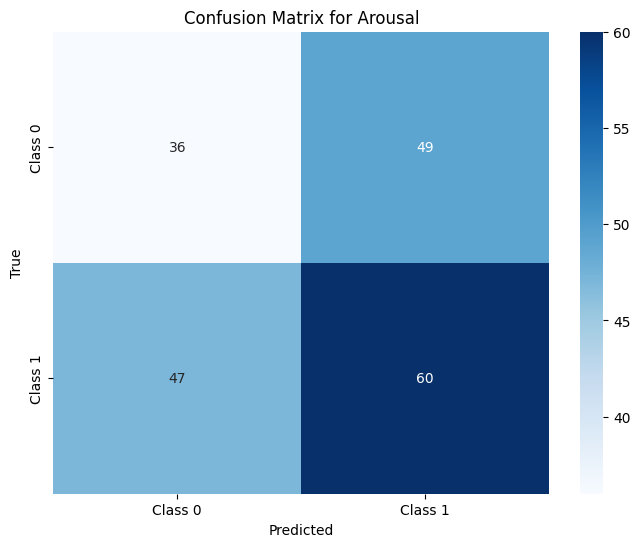

Classification Report for Arousal:
              precision    recall  f1-score   support

     Class 0       0.43      0.42      0.43        85
     Class 1       0.55      0.56      0.56       107

    accuracy                           0.50       192
   macro avg       0.49      0.49      0.49       192
weighted avg       0.50      0.50      0.50       192



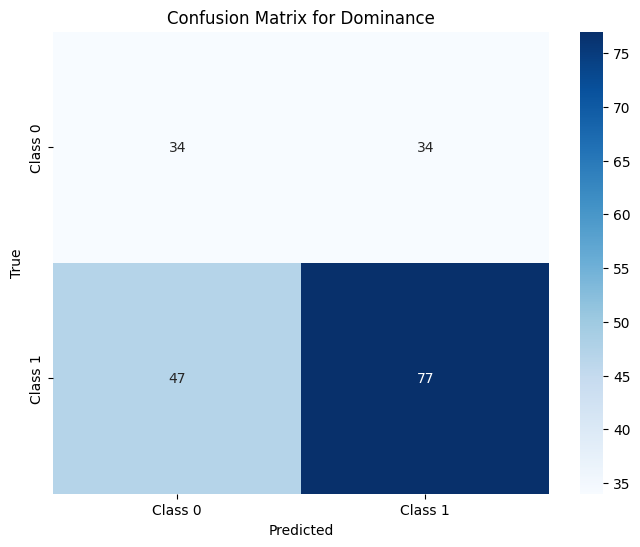

Classification Report for Dominance:
              precision    recall  f1-score   support

     Class 0       0.42      0.50      0.46        68
     Class 1       0.69      0.62      0.66       124

    accuracy                           0.58       192
   macro avg       0.56      0.56      0.56       192
weighted avg       0.60      0.58      0.58       192



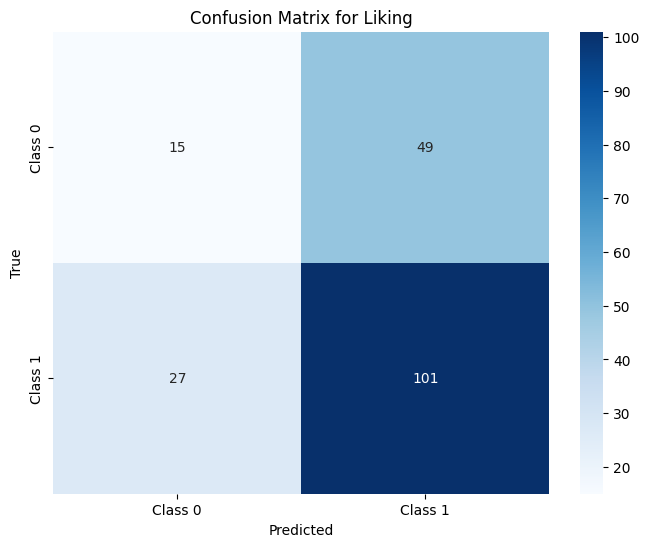

Classification Report for Liking:
              precision    recall  f1-score   support

     Class 0       0.36      0.23      0.28        64
     Class 1       0.67      0.79      0.73       128

    accuracy                           0.60       192
   macro avg       0.52      0.51      0.50       192
weighted avg       0.57      0.60      0.58       192



In [62]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 9: Evaluate the Model
evaluation = model.evaluate(
    X_test,
    [y_test[:, 0, :], y_test[:, 1, :], y_test[:, 2, :], y_test[:, 3, :]],
    verbose=1
)

# Print evaluation results for each output
print(f"Valence Loss: {evaluation[1]:.4f}, Valence Accuracy: {evaluation[5]:.2f}")
print(f"Arousal Loss: {evaluation[2]:.4f}, Arousal Accuracy: {evaluation[6]:.2f}")
print(f"Dominance Loss: {evaluation[3]:.4f}, Dominance Accuracy: {evaluation[7]:.2f}")
print(f"Liking Loss: {evaluation[4]:.4f}, Liking Accuracy: {evaluation[8]:.2f}")

# Step 10: Generate Predictions
predictions = model.predict(X_test)
y_pred = [pred.argmax(axis=1) for pred in predictions]  # Convert softmax outputs to class labels
y_true = [y_test[:, i, :].argmax(axis=1) for i in range(4)]

# Step 11: Confusion Matrices
output_names = ['Valence', 'Arousal', 'Dominance', 'Liking']
for i, (true, pred) in enumerate(zip(y_true, y_pred)):
    cm = confusion_matrix(true, pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {output_names[i]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Classification Report
    print(f"Classification Report for {output_names[i]}:")
    print(classification_report(true, pred, target_names=['Class 0', 'Class 1']))


In [63]:
# Save the model
model.save("emotion_rnn_multiclass_model.h5")